In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
salarydata_train = pd.read_csv(r"C:\Data Science Assignments\Basics Statistis 1\Naive bias\SalaryData_Train.csv.crdownload")
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
salarydata_test = pd.read_csv(r"C:\Data Science Assignments\Basics Statistis 1\Naive bias\SalaryData_Test.csv.crdownload")
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


## Exploratory data analysis


In [6]:
salarydata_train.shape

(4453, 14)

In [7]:
salarydata_test.shape

(14837, 14)

In [9]:
salarydata_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [10]:
salarydata_test.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [11]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453 entries, 0 to 4452
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4453 non-null   int64  
 1   workclass      4453 non-null   object 
 2   education      4453 non-null   object 
 3   educationno    4453 non-null   int64  
 4   maritalstatus  4453 non-null   object 
 5   occupation     4453 non-null   object 
 6   relationship   4453 non-null   object 
 7   race           4452 non-null   object 
 8   sex            4452 non-null   object 
 9   capitalgain    4452 non-null   float64
 10  capitalloss    4452 non-null   float64
 11  hoursperweek   4452 non-null   float64
 12  native         4452 non-null   object 
 13  Salary         4452 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 487.2+ KB


In [12]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,4453.000000,4453.000000,4452.00000,4452.000000,4452.000000
mean,38.564563,10.123961,1054.21788,95.484277,41.141959
std,13.097522,2.518288,7112.31052,414.644529,11.626018
min,17.000000,1.000000,0.00000,0.000000,1.000000
25%,28.000000,9.000000,0.00000,0.000000,40.000000
50%,37.000000,10.000000,0.00000,0.000000,40.000000
75%,47.000000,13.000000,0.00000,0.000000,45.000000
max,90.000000,16.000000,99999.00000,2547.000000,99.000000


In [13]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14837 entries, 0 to 14836
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            14837 non-null  int64  
 1   workclass      14837 non-null  object 
 2   education      14837 non-null  object 
 3   educationno    14837 non-null  int64  
 4   maritalstatus  14837 non-null  object 
 5   occupation     14836 non-null  object 
 6   relationship   14836 non-null  object 
 7   race           14836 non-null  object 
 8   sex            14836 non-null  object 
 9   capitalgain    14836 non-null  float64
 10  capitalloss    14836 non-null  float64
 11  hoursperweek   14836 non-null  float64
 12  native         14836 non-null  object 
 13  Salary         14836 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.6+ MB


In [14]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14837.000000,14837.000000,14836.000000,14836.00000,14836.000000
mean,38.756150,10.107299,1122.102049,88.62045,40.939202
std,13.386345,2.558894,7711.666065,405.43903,12.051354
min,17.000000,1.000000,0.000000,0.00000,1.000000
25%,28.000000,9.000000,0.000000,0.00000,40.000000
50%,37.000000,10.000000,0.000000,0.00000,40.000000
75%,48.000000,13.000000,0.000000,0.00000,45.000000
max,90.000000,16.000000,99999.000000,3770.00000,99.000000


In [15]:
#Finding the special characters in the data frame 
salarydata_train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [16]:
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male       2174.0   
1     Exec-managerial         Husband   White     Male          0.0   
2   Handlers-cleaners   Not-in-family   White     Male          0.0   
3   Handlers-cleaners         Husband   Black     Male          0.0   
4      Prof-specialty            Wife   Black   Female          0.0   

   capitalloss  hoursperweek          native  Salary  
0          0.0          40.0   United-States   <=50K  
1          0

#### Explore categorical variables

In [18]:
# find categorical variables

categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [19]:
salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [20]:
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             1
sex              1
native           1
Salary           1
dtype: int64

In [21]:
for var in categorical: 
    
    print(salarydata_train[var].value_counts())

 Private             3282
 Self-emp-not-inc     369
 Local-gov            311
 State-gov            184
 Self-emp-inc         168
 Federal-gov          138
 Without-pay            1
Name: workclass, dtype: int64
 HS-grad         1472
 Some-college     973
 Bachelors        766
 Masters          228
 Assoc-voc        195
 11th             168
 Assoc-acdm       144
 10th             122
 7th-8th           82
 Prof-school       81
 9th               68
 Doctorate         49
 12th              44
 5th-6th           38
 1st-4th           17
 Preschool          6
Name: education, dtype: int64
 Married-civ-spouse       2067
 Never-married            1434
 Divorced                  629
 Separated                 141
 Widowed                   124
 Married-spouse-absent      54
 Married-AF-spouse           4
Name: maritalstatus, dtype: int64
 Exec-managerial      586
 Craft-repair         586
 Prof-specialty       584
 Sales                566
 Adm-clerical         546
 Other-service        473

In [22]:

for var in categorical: 
    
    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))

 Private             0.737031
 Self-emp-not-inc    0.082865
 Local-gov           0.069841
 State-gov           0.041320
 Self-emp-inc        0.037727
 Federal-gov         0.030990
 Without-pay         0.000225
Name: workclass, dtype: float64
 HS-grad         0.330564
 Some-college    0.218504
 Bachelors       0.172019
 Masters         0.051201
 Assoc-voc       0.043791
 11th            0.037727
 Assoc-acdm      0.032338
 10th            0.027397
 7th-8th         0.018415
 Prof-school     0.018190
 9th             0.015271
 Doctorate       0.011004
 12th            0.009881
 5th-6th         0.008534
 1st-4th         0.003818
 Preschool       0.001347
Name: education, dtype: float64
 Married-civ-spouse       0.464181
 Never-married            0.322030
 Divorced                 0.141253
 Separated                0.031664
 Widowed                  0.027846
 Married-spouse-absent    0.012127
 Married-AF-spouse        0.000898
Name: maritalstatus, dtype: float64
 Exec-managerial      0.13159

In [23]:
salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [24]:
salarydata_train.workclass.value_counts()

 Private             3282
 Self-emp-not-inc     369
 Local-gov            311
 State-gov            184
 Self-emp-inc         168
 Federal-gov          138
 Without-pay            1
Name: workclass, dtype: int64

In [25]:
salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [26]:
salarydata_train.occupation.value_counts()

 Exec-managerial      586
 Craft-repair         586
 Prof-specialty       584
 Sales                566
 Adm-clerical         546
 Other-service        473
 Machine-op-inspct    302
 Transport-moving     237
 Handlers-cleaners    190
 Farming-fishing      138
 Tech-support         137
 Protective-serv       89
 Priv-house-serv       17
 Armed-Forces           2
Name: occupation, dtype: int64

In [27]:
salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland', nan],
      dtype=object)

In [28]:
salarydata_train.native.value_counts()

 United-States                 4045
 Mexico                          99
 Canada                          24
 Germany                         21
 Philippines                     20
 England                         16
 Puerto-Rico                     15
 Jamaica                         14
 El-Salvador                     14
 Cuba                            13
 Dominican-Republic              13
 India                           12
 China                           12
 Italy                           11
 Iran                            10
 Taiwan                          10
 Guatemala                        9
 Poland                           9
 Vietnam                          9
 Japan                            9
 Greece                           6
 South                            6
 Portugal                         6
 Haiti                            5
 Columbia                         5
 Ecuador                          4
 Cambodia                         4
 Trinadad&Tobago            

### Number of labels: cardinality


In [29]:
for var in categorical:
    
    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  7  labels
race  contains  6  labels
sex  contains  3  labels
native  contains  40  labels
Salary  contains  3  labels


In [30]:
# find numerical variables

numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [31]:
salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174.0,0.0,40.0
1,50,13,0.0,0.0,13.0
2,38,9,0.0,0.0,40.0
3,53,7,0.0,0.0,40.0
4,28,13,0.0,0.0,40.0


In [32]:
# check missing values in numerical variables

salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     1
capitalloss     1
hoursperweek    1
dtype: int64

#### Declare feature vector and target variable

In [33]:
X = salarydata_train.drop(['Salary'], axis=1)

y = salarydata_train['Salary']

In [35]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [36]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3117, 13), (1336, 13))

### Feature Engineering


In [37]:
X_train.dtypes


age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
dtype: object

In [38]:
X_test.dtypes


age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
dtype: object

In [39]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [40]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [41]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.000000
education        0.000000
maritalstatus    0.000000
occupation       0.000000
relationship     0.000000
race             0.000321
sex              0.000321
native           0.000321
dtype: float64

In [42]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

race 0.0003208213025344883
sex 0.0003208213025344883
native 0.0003208213025344883


In [43]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)  

In [44]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             1
sex              1
native           0
dtype: int64

In [45]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [46]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           0
dtype: int64

In [47]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

#### Encode categorical variables

In [48]:
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [49]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
2255,Private,Assoc-voc,Never-married,Other-service,Unmarried,White,Female,United-States
713,Private,Assoc-voc,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
4297,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1078,Private,11th,Divorced,Other-service,Not-in-family,Black,Female,United-States
2803,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States


In [50]:
!pip install category_encoders

In [51]:
# import category encoders

import category_encoders as ce

In [52]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [53]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_29,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38
2255,35,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
713,37,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4297,46,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1078,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,30,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_train.shape


(3117, 103)

In [55]:
X_test.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_29,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38
4341,33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
775,55,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,20,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2287,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
639,23,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_test.shape

(1336, 103)

#### Feature Scaling

In [57]:
cols = X_train.columns

In [58]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [59]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_29,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38
0,-0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.473684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model training

In [62]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
gnb = GaussianNB()

# Handle missing values in X_train (assuming X_train is a DataFrame)
X_train.fillna(X_train.mean(), inplace=True)

# Handle missing values in y_train (assuming y_train is a Series with categorical values)
# Fill missing values with the most frequent category
most_frequent_category = y_train.mode()[0]
y_train.fillna(most_frequent_category, inplace=True)


gnb.fit(X_train, y_train)


GaussianNB()

In [63]:
y_pred = gnb.predict(X_test)  ### predict the result

y_pred

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [64]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7987


In [65]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' >50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [66]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.7963


In [67]:
### overfitting and underfitting

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7963
Test set score: 0.7987


In [68]:
# checking class distribution in test set

y_test.value_counts()

 <=50K    984
 >50K     352
Name: Salary, dtype: int64

In [69]:
# checking null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


#### Confusion matrix

In [70]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[774 210]
 [ 59 293]]

True Positives(TP) =  774

True Negatives(TN) =  293

False Positives(FP) =  210

False Negatives(FN) =  59


<AxesSubplot:>

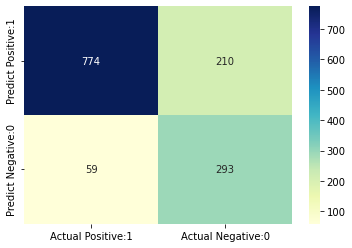

In [71]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Classification metrices

In [72]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7987


In [73]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2013


In [74]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7866


In [75]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9292


In [76]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9292


In [77]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4175


In [78]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5825


In [79]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.96948623e-01, 3.05137709e-03],
       [2.41114323e-05, 9.99975889e-01],
       [9.99995382e-01, 4.61826836e-06],
       [3.85134366e-01, 6.14865634e-01],
       [9.99970417e-01, 2.95832548e-05],
       [9.99999950e-01, 5.03968493e-08],
       [9.99986844e-01, 1.31556816e-05],
       [6.50465826e-17, 1.00000000e+00],
       [1.00000000e+00, 1.03434923e-10],
       [9.99999919e-01, 8.06366060e-08]])

In [80]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.969486e-01,3.051377e-03
1,2.411143e-05,9.999759e-01
2,9.999954e-01,4.618268e-06
3,3.851344e-01,6.148656e-01
4,9.999704e-01,2.958325e-05
5,9.999999e-01,5.039685e-08
6,9.999868e-01,1.315568e-05
7,6.504658e-17,1.000000e+00
8,1.000000e+00,1.034349e-10
9,9.999999e-01,8.063661e-08


In [81]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([3.05137709e-03, 9.99975889e-01, 4.61826836e-06, 6.14865634e-01,
       2.95832548e-05, 5.03968493e-08, 1.31556816e-05, 1.00000000e+00,
       1.03434923e-10, 8.06366060e-08])

In [82]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

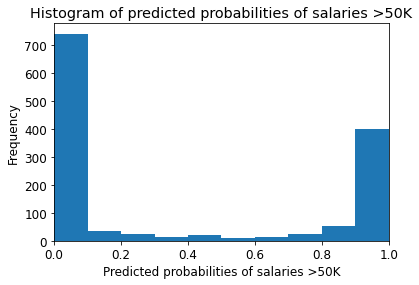

In [83]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

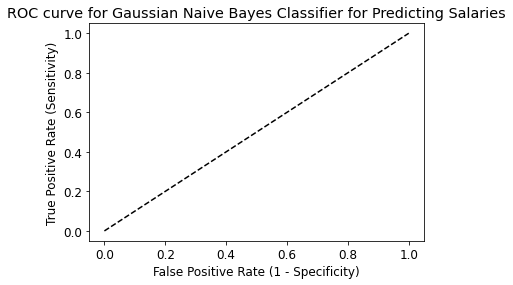

In [84]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [85]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8932


In [86]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8873


In [87]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80128205 0.78525641 0.75       0.76602564 0.80769231 0.79487179
 0.81089744 0.79742765 0.81672026 0.81350482]


In [88]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7944
